### Student Name in Canvas:  Lihong Zhao
### Penn ID: 51007389
##### Did you do this homework on your own (yes / no): yes
##### Resources used outside course materials: None
##### Statement: I admit that this assignment was done by me alone without help.

# Data Analysis - Celebrity Deaths in 2016

Source: [Wikipedia - Deaths in 2016](https://en.wikipedia.org/wiki/Deaths_in_2016)

#### Structure of dataset:
- File: "celebrity_deaths_2016.xlsx"
- Contains 2 sheets:
 - "celeb_death": contains records of deaths of famous humans and non-humans
 - "cause_of_death": contains the causes of the deaths (you'll need to merge it with the "celeb_death" sheet)

#### Other information about the dataset:
- The cause of death was not reported for all individuals
- The dataset might include deaths that took place in other years (you'll need to ignore these records)
- The dataset might contain duplicate records (you'll need to remove them)

#### The goals of the exercise:
- Load, merge, and clean the data
- Explore the data and answer some simple questions
- Run some basic analysis
- Visualize your results

In [732]:
"""
We're providing most of the import statements you need for the entire exercise
"""

import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

### Load, merge, and clean the data

In [733]:
""" 1.
1. Load the "celebrity_deaths_2016.xlsx" data file in the name "xl". (This file is saved in the same directory as this notebook.)
2. Print the sheet names

Hint:
Look at the xl.sheet_names property
"""

# your code here
xl = pd.ExcelFile('celebrity_deaths_2016-1.xlsx')
# get the sheet names
sheet_names = xl.sheet_names
# print the sheet names
print(sheet_names)


['celeb_death', 'cause_id_all', 'cause_of_death']


In [734]:
""" 2.
1. Read the "celeb_death" sheet into a dataframe named "df"
2. Take a look at the top 5 rows
"""

# your code here
df = xl.parse('celeb_death')
df.head()

c:\Users\zlhgl\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date of death,name,age,bio,cause_id
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0


In [735]:
""" 3.
1. Take a look at the data types stored in each column in df
2. Get the shape of df
"""

# your code here
print(df.dtypes)
print()
print(df.shape)

date of death    datetime64[ns]
name                     object
age                      object
bio                      object
cause_id                float64
dtype: object

(6594, 5)


In [736]:
""" 4.
Drop the duplicates (based on all columns) from df
"""

# your code here
df.drop_duplicates()

,date of death,name,age,bio,cause_id
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0
...,...,...,...,...,...
6589,2015-05-14,BB King,89,Singer,10648.0
6590,2015-06-07,Christopher Lee,93,Actor,10648.0
6591,2015-07-31,Roddy Piper,61,Pro Wrestler,9047.0
6592,2015-09-22,Yogi Berra,90,Baseball Player,12202.0


In [737]:
""" 5.
1. Read the "cause_of_death" sheet into a DataFrame named "cause_of_death"
2. Take a look at the top 5 rows
"""

# your code here
cause_of_death = xl.parse('cause_of_death')
cause_of_death.head()

c:\Users\zlhgl\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,cause_id,cause of death
0,753,ALS
1,1039,bomb
2,1120,shot
3,1499,fall
4,1629,shot


In [738]:
""" 6.
Drop the duplicates (based on the "cause_id" column) from the cause_of_death DataFrame

Hint: There is a single DataFrame method that does this
Use the "subset" argument to specify the "cause_id" column

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
"""

# your code here
cause_of_death.drop_duplicates(subset=['cause_id'])

,cause_id,cause of death
0,753,ALS
1,1039,bomb
2,1120,shot
3,1499,fall
4,1629,shot
...,...,...
344,116752,injuries sustained in Brussels Airport bombings
345,119640,complications from a fall and Alzheimer's dis...
346,129613,complications from esophageal cancer and pneu...
347,133339,pneumonia as a complication from a kidney inf...


In [739]:
""" 7.
1. Merge the cause_of_death DataFrame with the df DataFrame and name the new DataFrame as "df"
2. Take a look at the top 5 rows in df

Note: There are records in df (left DataFrame) that do not have a matching record in cause_of_death (right DataFrame)
We want to see ALL records in df despite the missing matches in cause_of_death, so you DON'T want to use an "inner join"
"""

# your code here
df = pd.merge(left=df, right=cause_of_death, on='cause_id', how='left')
df.head()


,date of death,name,age,bio,cause_id,cause of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure


In [740]:
df.dtypes

date of death     datetime64[ns]
name                      object
age                       object
bio                       object
cause_id                 float64
cause of death            object
dtype: object

In [741]:
df.shape

(6613, 6)

### Querying data

For the following questions, all the operations are on the Dataframe df.

In [742]:
""" 8.
We'll be doing some calculations with the age column, but it was loaded from the data file as dtype "object"
So first, we need to cast DataFrame df to a numeric value
"""

# your code here
# df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
df.dtypes

date of death     datetime64[ns]
name                      object
age                        Int64
bio                       object
cause_id                 float64
cause of death            object
dtype: object

In [743]:
""" 9.
What was the average age of death? Store this value in a variable called 'avg_age', then print it.
"""

# your code here
avg_age = round(df['age'].mean())
print(avg_age)

77


In [744]:
""" 10.
How many people died after the age of 70?
-- Store the result count in a variable named "count" and print it
"""

# your code here
count = df[df['age'] > 70]['age'].count()
print(count)

4776


In [745]:
""" 11.
Who died the youngest and what was the cause of death?
-- Store the name in a variable named "youngest_name" and print it
-- Store the cause in a variable named "youngest_cause" and print it

Hint: Get the min age and find the record that has that value
"""

# your code here
min_age = df['age'].min()
# select the row with the minimum age
youngest_row = df[df['age'] == min_age]
# extract the name from the youngest row
youngest_name = youngest_row['name'].values[0].strip() #  use the .values[0] to extract the scalar (single) value itself from the array since we only want to extract the value itself (not the index or any other metadata that might be included in the Series)
# extract the cause of death from the youngest row
youngest_cause = youngest_row['cause of death'].values[0].strip() #  use the .values[0] to extract the scalar (single) value itself from the array since we only want to extract the value itself (not the index or any other metadata that might be included in the Series)
print(youngest_name)
print(youngest_cause)

Vautour
euthanised


In [746]:
""" 12.
We'll be running some queries based on the "bio" column, 
but it was loaded from the data file as an object.  So first, cast this column to a string.
"""

# your code here
df['bio'] = df['bio'].astype("string")
df.dtypes

date of death     datetime64[ns]
name                      object
age                        Int64
bio                       string
cause_id                 float64
cause of death            object
dtype: object

In [747]:
""" 13.
How many American celebrities died?
-- Store the result count in a variable named "count_american" and print it

Hint: Search the bio for "American"
"""

# your code here
# use str.contains() to check if "bio" column contains "American"
count_american = (df['bio'].str.contains('American')).sum()
print(count_american)

2152


In [748]:
""" 14.
What was one known cause of death for celebrities who died at age 50?
-- Name the result as "rand_cause"
-- Print the result using "print("Age 50. Cause of Death:", rand_cause)"

Hint: 
Get all the celebrity death records for celebrities who died at 50  
Ignore the ones where the cause of death is unknown, or NaN
import random and randomly select one of the death records 
Extract the cause of death and store in a variable "rand_cause"
"""

#############################################################################################
### DO NOT MODIFY THIS! WE NEED TO SEED THE RANDOM VALUE TO ACCURATELY TEST YOUR SOLUTION ###
import random
random.seed(0)
#############################################################################################

# your code here
# filter celeb_death with only including age is 50 and cause of death is not unknown or NaN
age_50_causes = df[(df['age'] == 50) & (df['cause of death'].notnull())]
# use the sample() method from the random module to randomly select one row from the filtered celeb_death
rand_row = age_50_causes.sample()
rand_cause = rand_row['cause of death'].values[0].strip() #  use the .values[0] to extract the scalar (single) value itself from the array since we only want to extract the value itself (not the index or any other metadata that might be included in the Series)
print("Age 50. Cause of Death:", rand_cause)

Age 50. Cause of Death: stabbed


In [749]:
""" 15.
What was the mean age for each cause of death?

Hint: import numpy and group by 'cause of death', then get the mean age and store the 
resulting DataFrame in a variable named 'df_grouped_cause', then print it
"""
# your code here
import numpy as np

df_grouped_cause = df.groupby('cause of death')['age'].mean().round().reset_index() # use reset_index to convert the Series object into a DataFrame
print(df_grouped_cause)


                                cause of death   age
0                          Alzheimer's disease  80.0
1                                Myself and I)  76.0
2                          Parkinson's disease  80.0
3     Parkinson's disease and multiple myeloma  69.0
4                               Pick's disease  68.0
..                                         ...   ...
329                                plane crash  56.0
330             progressive supranuclear palsy  84.0
331                                       shot  56.0
332                                    stabbed  85.0
333                                      tased  48.0

[334 rows x 2 columns]


### Count the number of people who died in each month of 2016
1. Create new columns that shows which month and year each person died in
2. Group all the entries based on the month they appeared in

In [750]:
""" 16.
Make a new column in the DataFrame df with the numeric month of death

Hint:
Use the apply() method to run a function against the "date of death" column,
and return the numeric month (get the value by using ".month")
"""

def get_month(date):
    # your code here
    return pd.to_datetime(date).month

df['month of death'] = df['date of death'].apply(get_month)
df.head()
    

,date of death,name,age,bio,cause_id,cause of death,month of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer,1
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer,1
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer,1
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure,1


In [751]:
""" 17.
Make a new column in the DataFrame df with the year of death

Hint: Apply a function to get the year from the "date of death" column
"""

def get_year(date):
    # your code here
    return date.year

df['year of death'] = df['date of death'].apply(get_year)
df.head()

,date of death,name,age,bio,cause_id,cause of death,month of death,year of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer,1,2016
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer,1,2016
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer,1,2016
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure,1,2016


In [752]:
""" 18.
There could be a small number of deaths that didn't take place in 2016.  Just in case, 
filter out the deaths that didn't take place in 2016.
-- Name the new DataFrame as "df_2016"
"""

# your code here
df_2016 = df[df['year of death'] == 2016]

In [753]:
""" 19.
Using a pivot table, obtain a list that contains the number of people that died in each month
-- Use the new DataFrame "df_2016"
-- Name the result as "df_per_month"
"""

# your code here
df_per_month = pd.pivot_table(df_2016, 
                              index=df['month of death'], 
                              values='name', 
                              aggfunc='count')



### Data Visualization

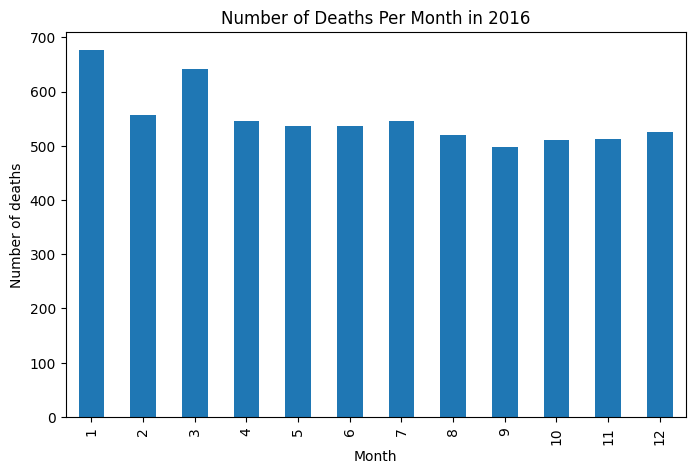

In [754]:
""" 20. 
Visualize the number of deaths per month as a bar chart

Hint: A DataFrame has a simple .plot() method you can use.  

The x axis should show the individual number of the month and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axes
"""

# your code here

# create a bar chart from the pivot table: df_per_month
bar_chart1 = df_per_month.plot(kind='bar', figsize=(8,5), legend=None)

# set the title and labels
bar_chart1.set_title("Number of Deaths Per Month in 2016")
bar_chart1.set_xlabel("Month")
bar_chart1.set_ylabel("Number of deaths")


###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

### Make a bar chart that plots the number of deaths per nationality
1. Create a new column that identifies the nationality of each celebrity, extracting the first word from the bio
2. Make a bar chart that plots the number of deaths per nationality

In [755]:
""" 21.
Create a new column in the DataFrame df that identifies the nationality of each celebrity, 
extracting the first word from the bio

Hint:
To get the nationality from the bio, use the method split() on the column "bio" 
and use the first element in the split result as the nationality.

For simplicity purposes, don't worry about nationalities containing more than 1 word.  For example, 
when getting the nationality from "bio", it's OK to get "New" for New Zealand or "Costa" for Costa Rican.
"""

def get_nationality(bio):
    # if it is NaN value, return NaN
    if pd.isna(bio):
        return np.nan
    else:
        return bio.split()[0]

# create a new column "nationality" in the DataFrame "df"
df['nationality'] = df['bio'].apply(get_nationality)
df.head()

,date of death,name,age,bio,cause_id,cause of death,month of death,year of death,nationality
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer,1,2016,American
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer,1,2016,American
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer,1,2016,Australian
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016,Costa
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure,1,2016,Russian


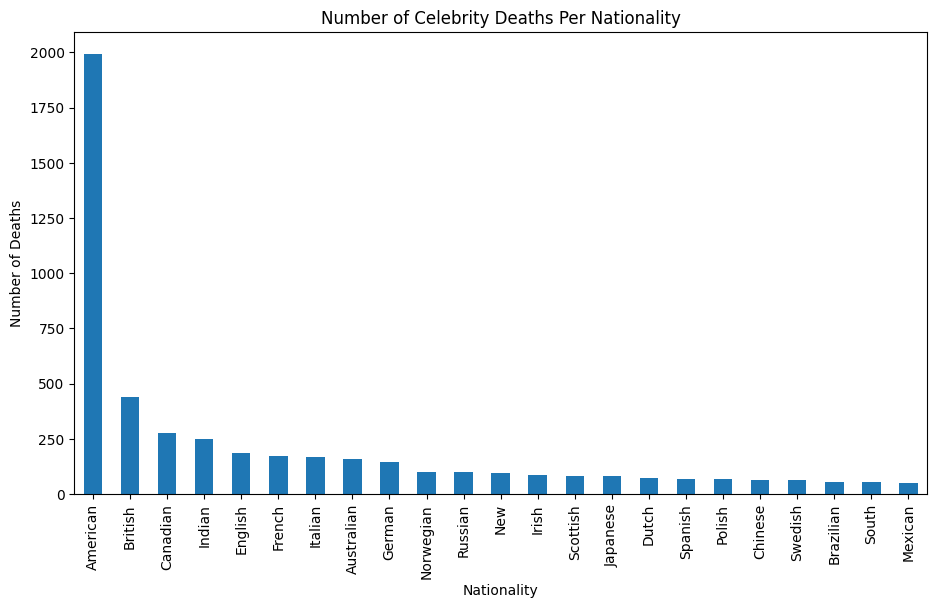

In [756]:
""" 22.
Make a bar chart that plots the number of deaths per nationality
Only include nationalities with more than 50 deaths
-- Name the resulting Series as "unlucky_countries"
Hint(s):
Get the count of unique values in the 'nationality' column using the value_counts() method.
Filter the resulting Series to only include those nationalities with a count of more than 50.
Plot the final Series.  Note, a Series has a simple .plot() method you can use.
The x axis should show the individual nationalities and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axis
"""

# your code here

# count the number of deaths per nationality
nationality_count = df['nationality'].value_counts()

# filter to only include nationalities with more than 50 deaths
nationality_greater50 = nationality_count[nationality_count > 50]

# create the bar chart plot
bar_chart2 = nationality_greater50.plot(kind='bar', figsize=(11,6))

# set the title and axis labels
bar_chart2.set_title('Number of Celebrity Deaths Per Nationality')
bar_chart2.set_xlabel('Nationality')
bar_chart2.set_ylabel('Number of Deaths')


###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################